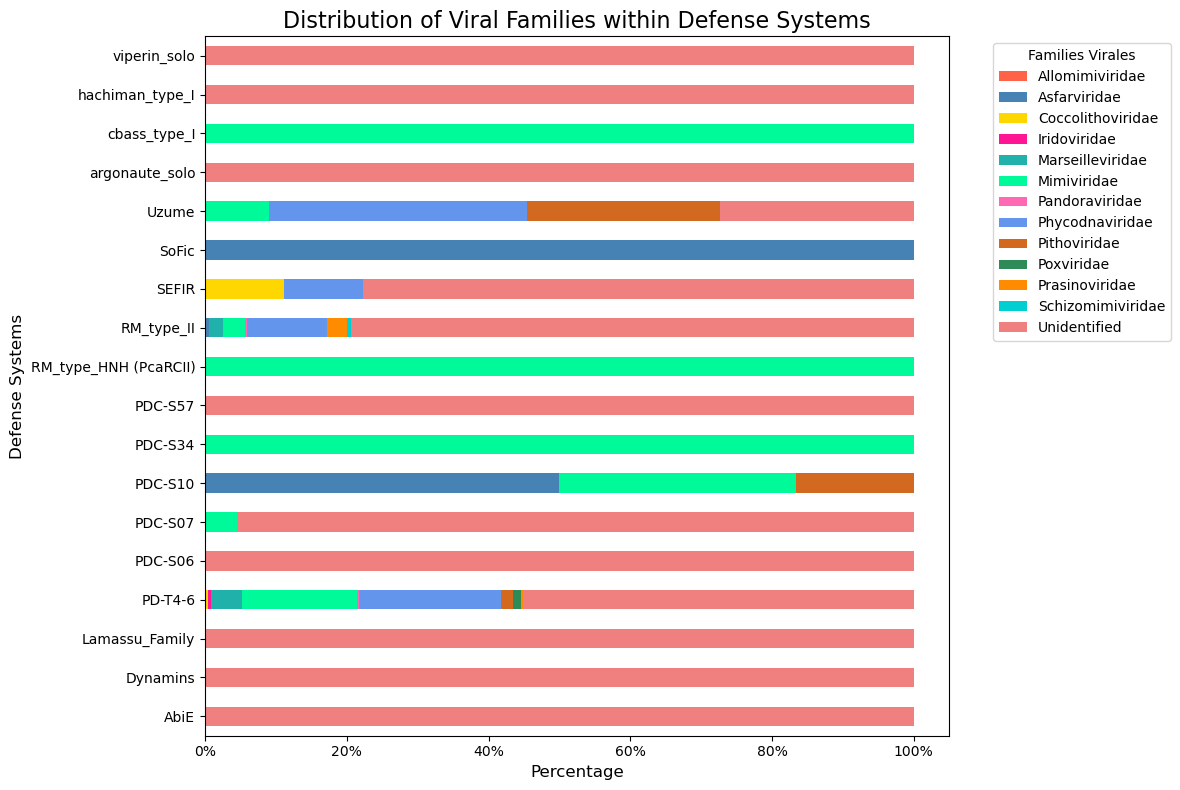

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap

# Cargar el archivo CSV
file_path = 'all_classified_f.csv'  # Cambia esta ruta por la correcta
data = pd.read_csv(file_path)

# Agrupar datos por sistema de defensa y familia viral
grouped_data = data.groupby(['subtype', 'Family']).size().reset_index(name='count')

# Para cada sistema de defensa, calcular el porcentaje de familias virales
grouped_data['percentage'] = grouped_data.groupby('subtype')['count'].transform(lambda x: x / x.sum() * 100)

# Crear una tabla pivote para preparar los datos para el gráfico de barras apiladas
pivot_data = grouped_data.pivot(index='subtype', columns='Family', values='percentage').fillna(0)

# Crear una paleta de colores más vivos y amplia (agregamos más colores en caso de que haya más de 10 familias)
colors_vivos = ListedColormap([
    '#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#FF1493', '#20B2AA', '#FF4500', 
    '#00FA9A', '#1E90FF', '#FF69B4', '#6495ED', '#ADFF2F', '#D2691E', '#FFB6C1', '#2E8B57', 
    '#FF8C00', '#7B68EE', '#00CED1', '#F08080'
])

# Crear el gráfico de barras apiladas con orientación horizontal
pivot_data.plot(kind='barh', stacked=True, figsize=(12, 8), colormap=colors_vivos)

# Añadir etiquetas y título
plt.title('Distribution of Viral Families within Defense Systems', fontsize=16)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Defense Systems', fontsize=12)

# Formatear el eje X para que muestre el símbolo de porcentaje
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())

# Ajustar leyenda y layout
plt.legend(title='Families Virales', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()
